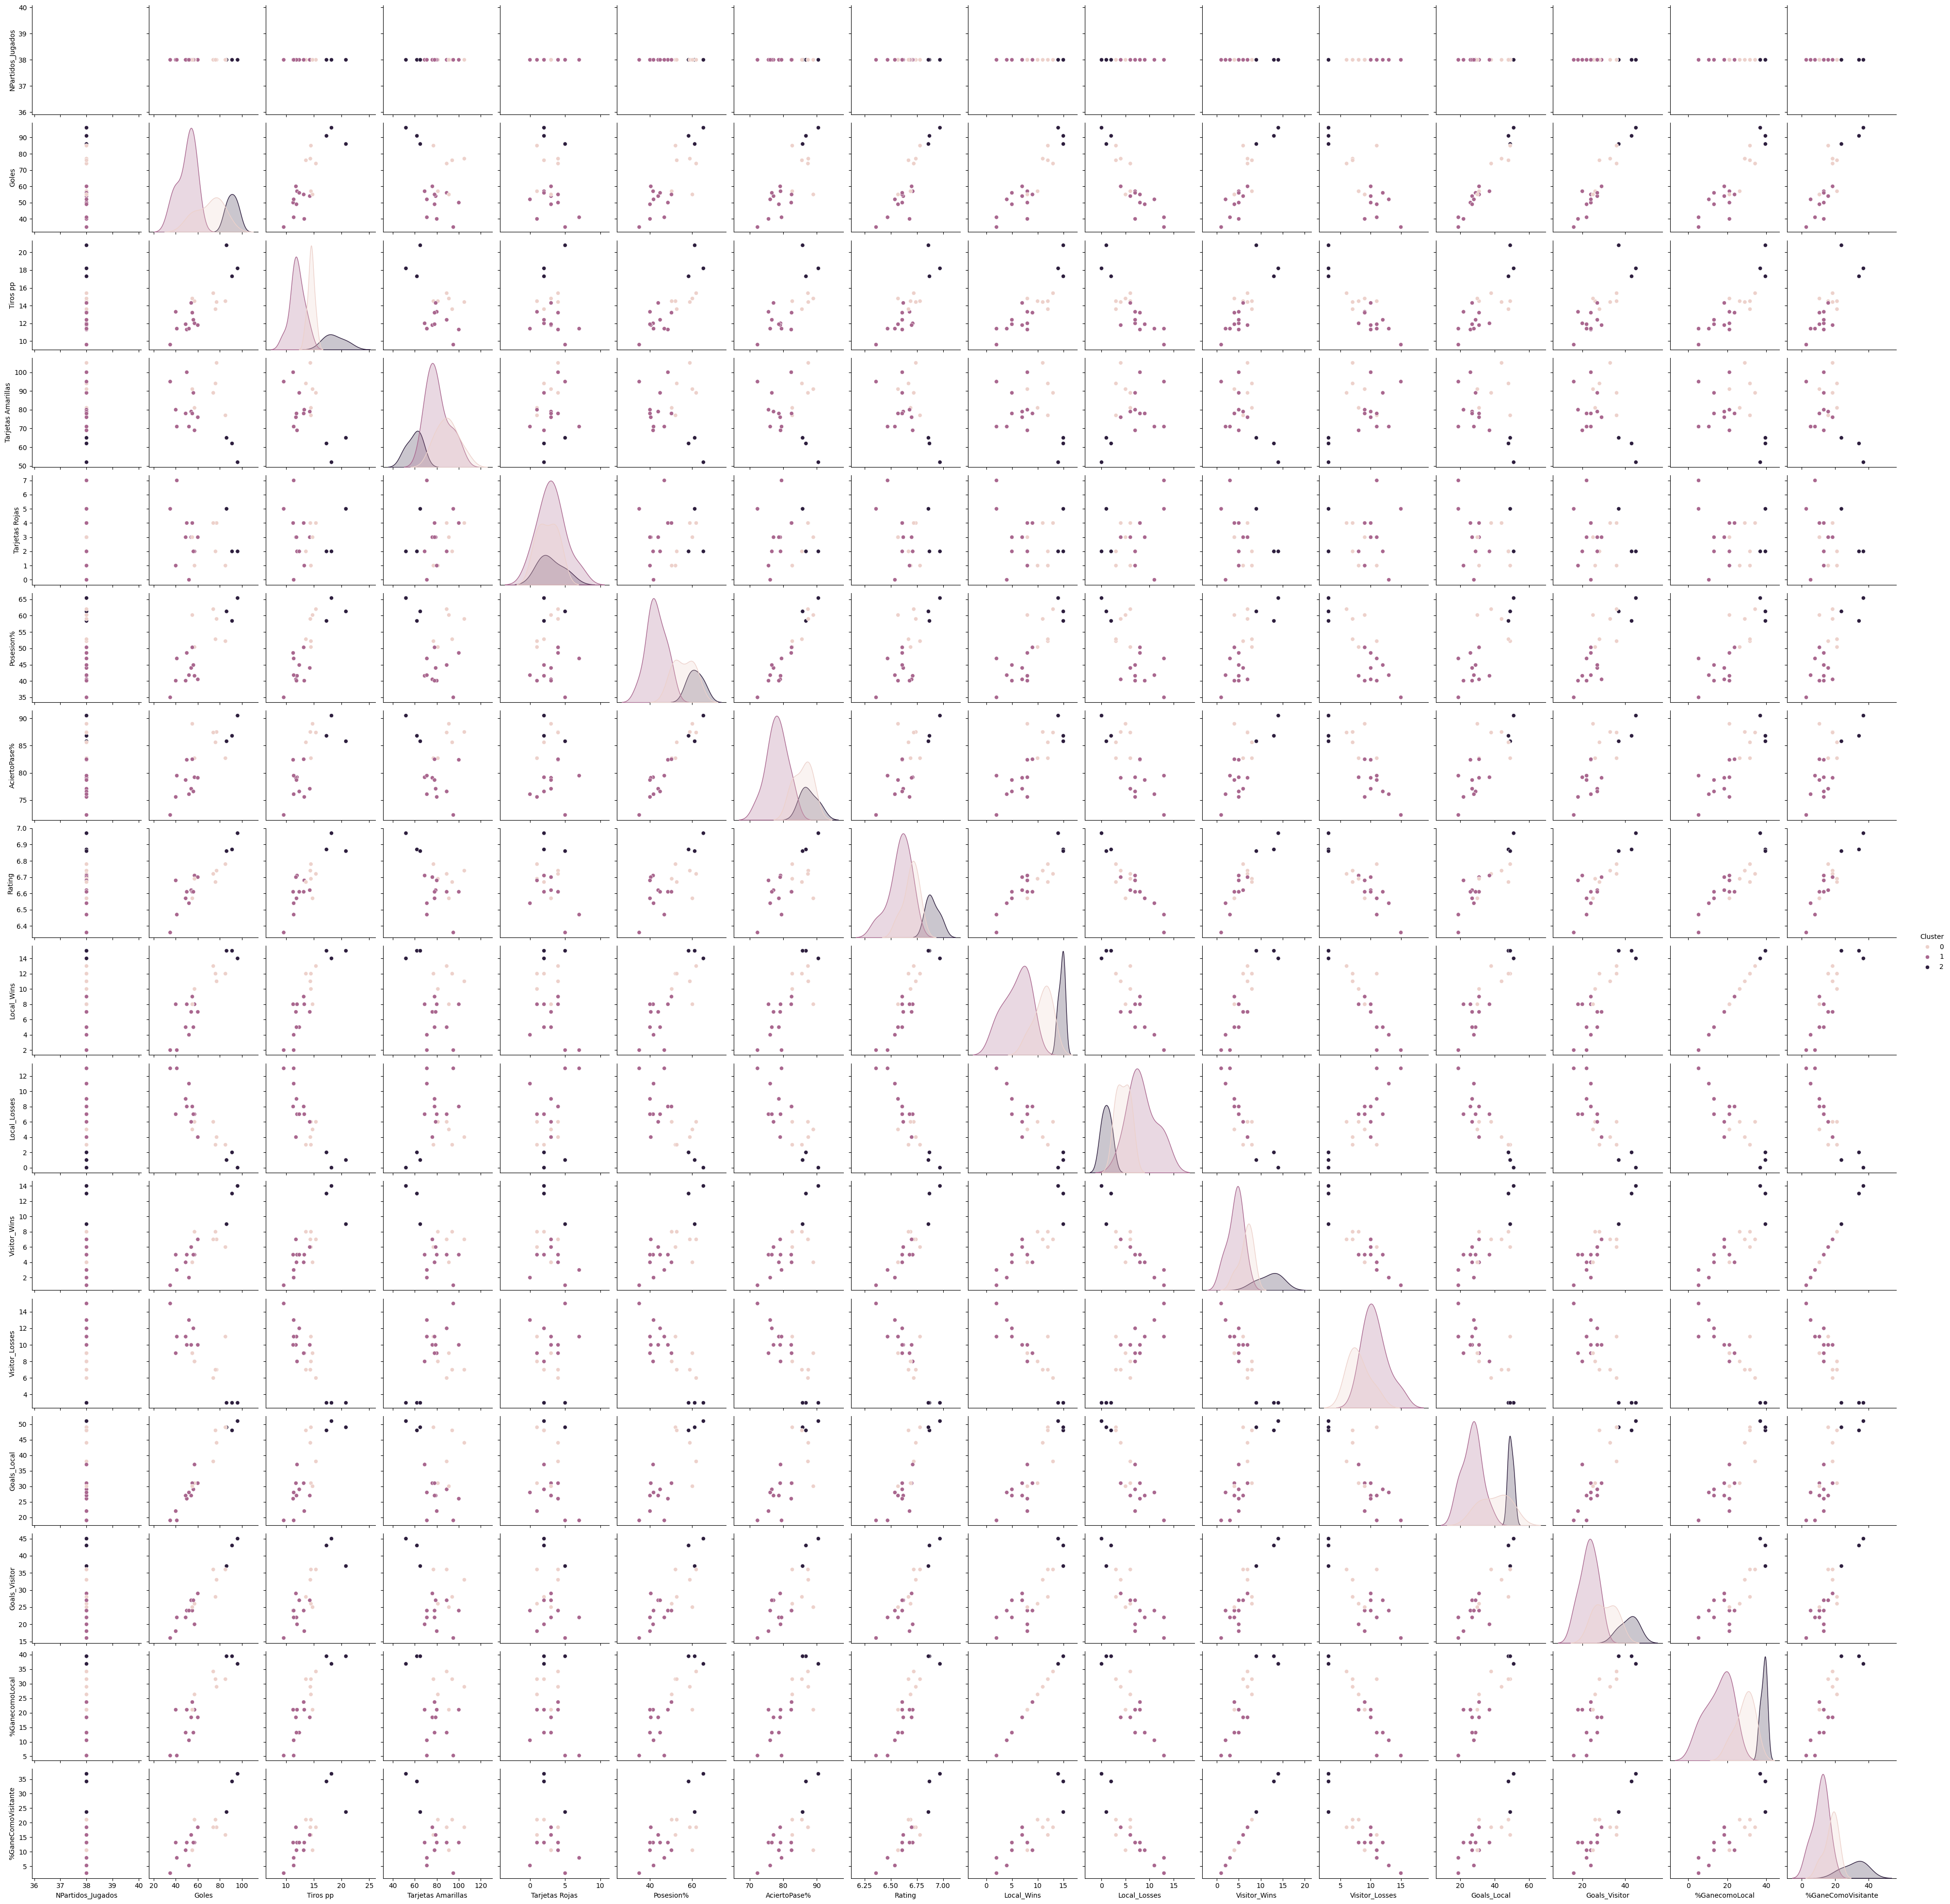

In [1]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('equipos_futbol.csv')

# Seleccionar las columnas numéricas
numerical_columns = ['NPartidos_Jugados', 'Goles', 'Tiros pp', 'Tarjetas Amarillas',
                     'Tarjetas Rojas', 'Posesion%', 'AciertoPase%', 'Rating', 'Local_Wins',
                     'Local_Losses', 'Visitor_Wins', 'Visitor_Losses', 'Goals_Local',
                     'Goals_Visitor', '%GanecomoLocal', '%GaneComoVisitante']

# Escalar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_columns])

# Aplicar GMM con 3 clusters (puedes ajustar este número)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(scaled_data)

# Obtener los clusters
df['Cluster'] = gmm.predict(scaled_data)

# Visualizar los resultados
sns.pairplot(df, hue='Cluster', vars=numerical_columns)
plt.show()

# Guardar el resultado con los clusters
df.to_csv('equipos_futbol_con_clusters.csv', index=False)


In [2]:
# Contar el número de equipos en cada cluster
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)


Cluster
1    11
0     6
2     3
Name: count, dtype: int64


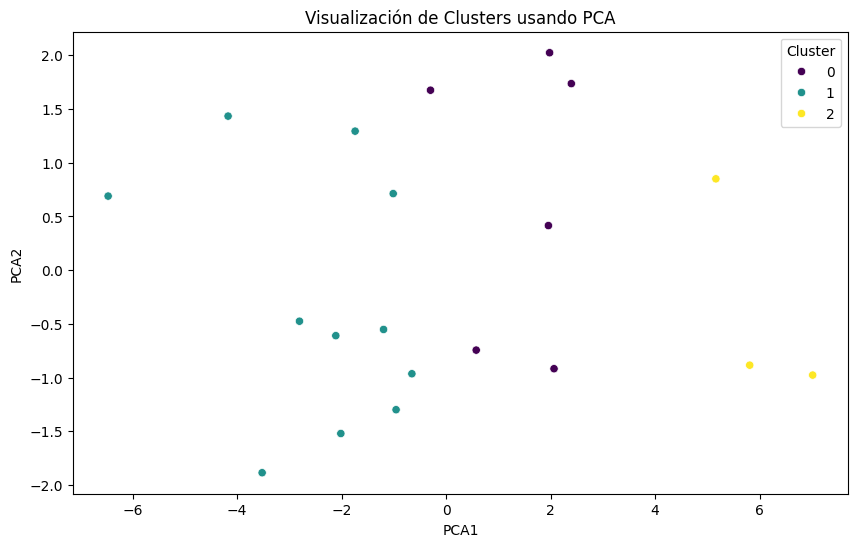

In [3]:
from sklearn.decomposition import PCA

# Reducir los datos a 2 dimensiones usando PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Añadir los resultados de PCA al dataframe
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Visualizar los clusters en 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Visualización de Clusters usando PCA')
plt.show()


In [9]:
# Calcular AIC y BIC del modelo
aic = gmm.aic(scaled_data)
bic = gmm.bic(scaled_data)

print(f"AIC: {aic}")
print(f"BIC: {bic}")


AIC: -943.816754624077
BIC: -487.77137333634914


In [11]:
print(df.head())



            Equipo  NPartidos_Jugados  Goles  Tiros pp  Tarjetas Amarillas  \
0  Manchester City                 38     96      18.2                  52   
1          Arsenal                 38     91      17.3                  62   
2        Liverpool                 38     86      20.8                  65   
3        Newcastle                 38     85      14.5                  77   
4          Chelsea                 38     77      14.4                 105   

   Tarjetas Rojas  Posesion%  AciertoPase%  Rating  Local_Wins  ...  \
0               2       65.4          90.5    6.97          14  ...   
1               2       58.4          86.8    6.87          15  ...   
2               5       61.3          85.8    6.86          15  ...   
3               1       52.2          82.7    6.78          12  ...   
4               4       59.0          87.5    6.74          11  ...   

   Local_Losses  Visitor_Wins  Visitor_Draws  Visitor_Losses  Goals_Local  \
0           0.0            

In [12]:
df['Cluster'] = gmm.predict(scaled_data)


In [14]:
# Comprobar si la columna 'Cluster' está presente
if 'Cluster' in df.columns:
    cluster_means = df.groupby('Cluster')[numerical_columns].mean()
    print(cluster_means)
else:
    print("La columna 'Cluster' no está en el DataFrame.")


         NPartidos_Jugados      Goles   Tiros pp  Tarjetas Amarillas  \
Cluster                                                                
0                     38.0  70.666667  14.533333           89.500000   
1                     38.0  49.909091  12.054545           80.545455   
2                     38.0  91.000000  18.766667           59.666667   

         Tarjetas Rojas  Posesion%  AciertoPase%    Rating  Local_Wins  \
Cluster                                                                  
0              2.500000  56.100000     85.816667  6.695000   11.000000   
1              3.090909  43.072727     78.100000  6.589091    5.909091   
2              3.000000  61.700000     87.700000  6.900000   14.666667   

         Local_Losses  Visitor_Wins  Visitor_Losses  Goals_Local  \
Cluster                                                            
0            4.500000      6.666667        8.000000    40.000000   
1            8.454545      4.272727       10.727273    26.909091

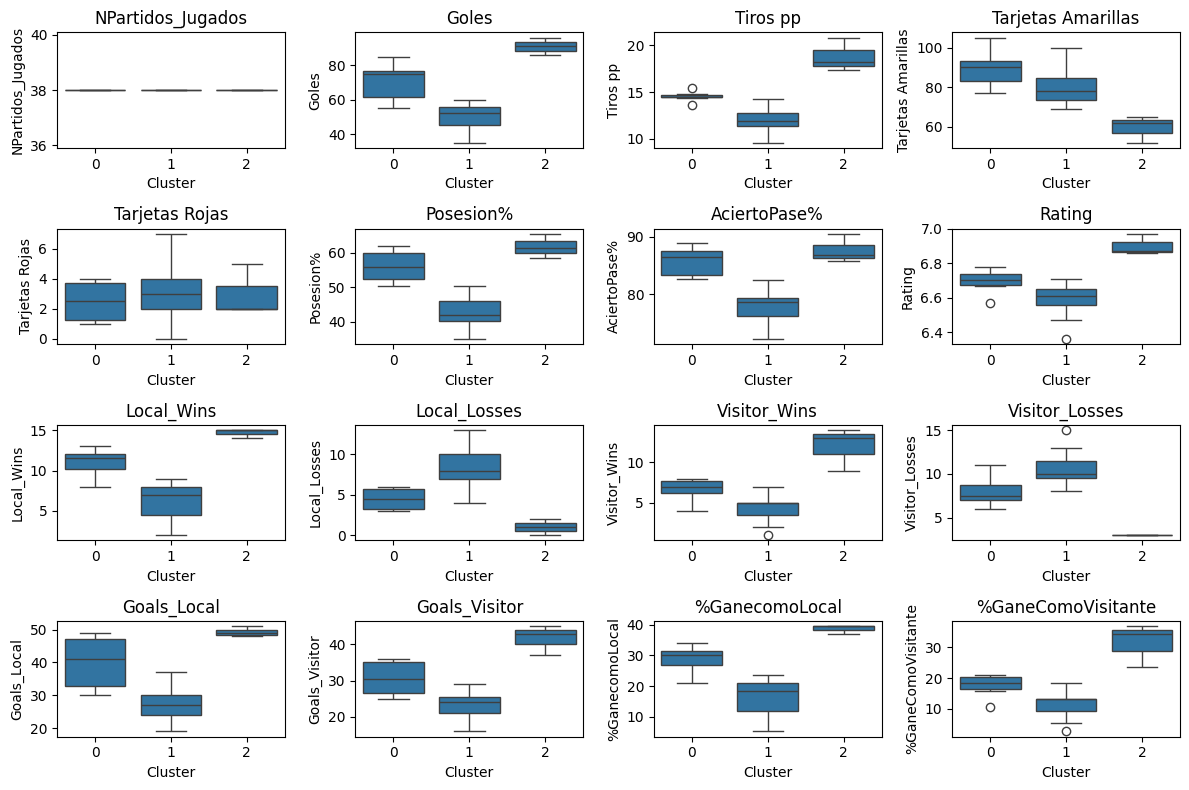

In [16]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)  # Ajusta la cantidad de subgráficos según la cantidad de columnas
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(column)
plt.tight_layout()
plt.show()


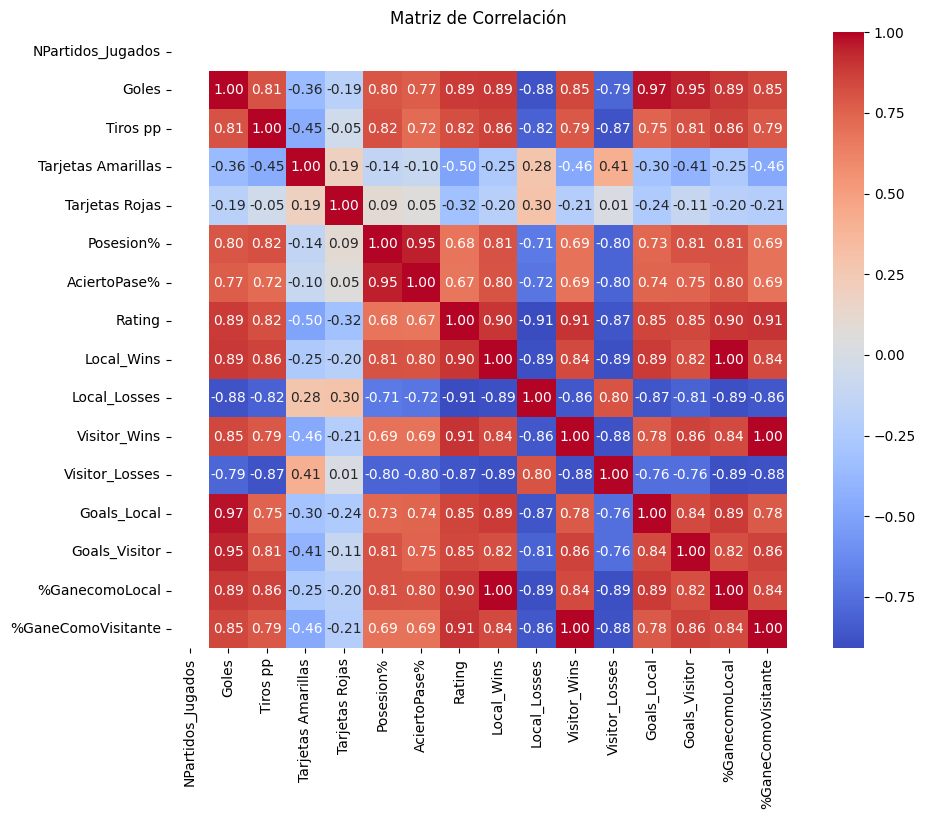

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()


In [18]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.33463240460285715


In [25]:
# Equipos a comparar
equipo1 = 'Manchester City'
equipo2 = 'Aston Villa'

# Obtener las estadísticas y el cluster de cada equipo
stats_equipo1 = df[df['Equipo'] == equipo1].iloc[0]
stats_equipo2 = df[df['Equipo'] == equipo2].iloc[0]

# Comparar Goles
print(f"Goles anotados: {equipo1}: {stats_equipo1['Goles']}, {equipo2}: {stats_equipo2['Goles']}")

# Comparar % de Gane como Local y Visitante
print(f"% Gane como Local: {equipo1}: {stats_equipo1['%GanecomoLocal']}, {equipo2}: {stats_equipo2['%GanecomoLocal']}")
print(f"% Gane como Visitante: {equipo1}: {stats_equipo1['%GaneComoVisitante']}, {equipo2}: {stats_equipo2['%GaneComoVisitante']}")

# Comparar el Rating
print(f"Rating: {equipo1}: {stats_equipo1['Rating']}, {equipo2}: {stats_equipo2['Rating']}")

# Comparar Cluster
print(f"Cluster: {equipo1}: {stats_equipo1['Cluster']}, {equipo2}: {stats_equipo2['Cluster']}")


Goles anotados: Manchester City: 96, Aston Villa: 76
% Gane como Local: Manchester City: 36.84210526315789, Aston Villa: 31.57894736842105
% Gane como Visitante: Manchester City: 36.84210526315789, Aston Villa: 21.052631578947366
Rating: Manchester City: 6.97, Aston Villa: 6.67
Cluster: Manchester City: 2, Aston Villa: 0
